<a href="https://colab.research.google.com/github/A-THAKUR22/MarchAssignments/blob/main/Assignment14March26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [11]:
employee_ret=pd.read_csv('HR_comma_sep.csv')
employee_ret

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<Axes: xlabel='satisfaction_level', ylabel='Count'>

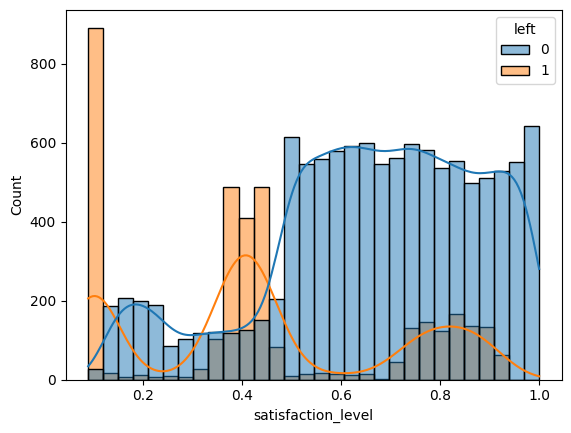

In [17]:
#Perform EDA
sns.histplot(x='satisfaction_level', hue='left', data=employee_ret, kde=True)

<ipython-input-18-2883eb9b471e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=employee_ret.corr()


<Axes: >

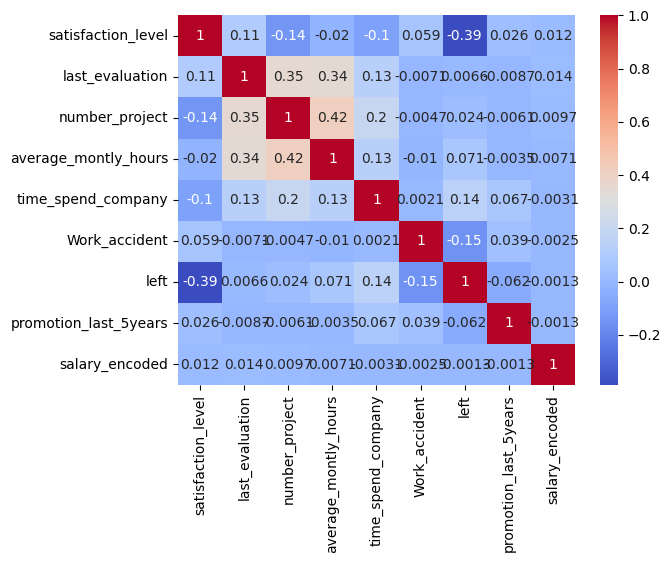

In [18]:
correlation=employee_ret.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
employee_ret['salary_encoded']=encoder.fit_transform(employee_ret['salary'])

In [13]:
correlation_coefficients = employee_ret.corr()['left'].drop('left')
correlation_coefficients

<ipython-input-13-8893e3d3abdf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coefficients = employee_ret.corr()['left'].drop('left')


satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
promotion_last_5years   -0.061788
salary_encoded          -0.001294
Name: left, dtype: float64

<Axes: xlabel='Department', ylabel='left'>

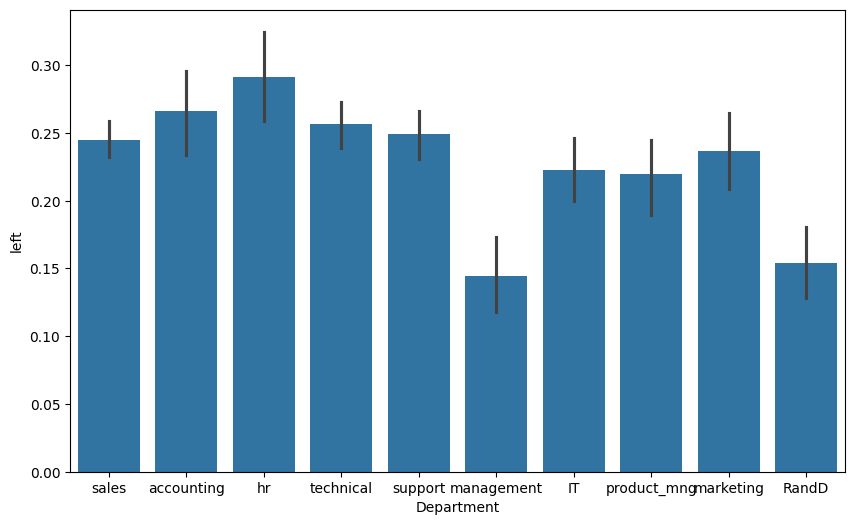

In [20]:
#Barplot betwwen left employees variable and Department
plt.figure(figsize=(10, 6))
sns.barplot(x='Department',y='left',data=employee_ret)

<Axes: xlabel='left', ylabel='salary_encoded'>

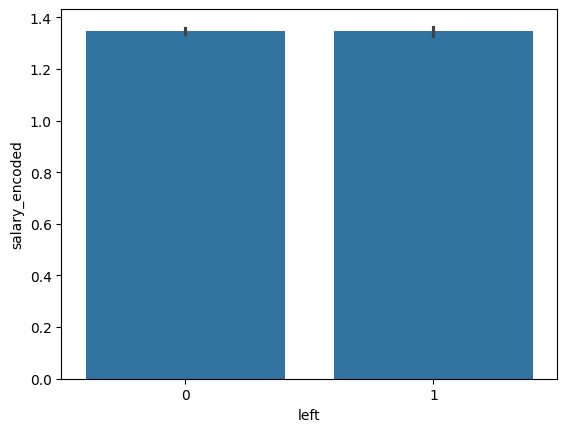

In [21]:
#Barplot between left employees variable and the salary(encoded) they had
sns.barplot(x='left',y='salary_encoded',data=employee_ret)

In [14]:
#Performing hyperparameter tuning for better accuracy

from sklearn.model_selection import GridSearchCV
#Define the hyperparameters grid  regularization penalty, regularization strength, optimization algorithm, maximum number of iterations
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

#Dividing data in features X and target variable y
X=employee_ret[['satisfaction_level','number_project','average_montly_hours','Work_accident','promotion_last_5years']]
y=employee_ret['left']

#Splitting data into training anda testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=149)

#Create logistic regression model
model = LogisticRegression()

#Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

#Perform grid search
grid_search.fit(X_train, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#Get the best model
best_model = grid_search.best_estimator_

#Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8026666666666666


In [22]:
#Make predictions
y_pred=grid_search.predict(X_test)
print(f'The predictions are : {y_pred}')

The predictions are : [0 0 0 ... 0 0 0]


In [23]:
#Checking accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy=accuracy_score(y_test,y_pred)
Precision=precision_score(y_test,y_pred)
Recall=recall_score(y_test,y_pred)
F1=f1_score(y_test,y_pred)
Roc=roc_auc_score(y_test,y_pred)

print(f'Accuracy of the model : {Accuracy}')
print(f'Precision Score:{Precision}')
print(f'Recall Score:{Recall}')
print(f'F1 Score:{F1}')
print(f'Roc and Auc Score:{Roc}')

Accuracy of the model : 0.8026666666666666
Precision Score:0.7101449275362319
Recall Score:0.21649484536082475
F1 Score:0.33182844243792325
Roc and Auc Score:0.5953219595179824
